In [12]:
import numpy as np
from scipy.io import loadmat
dataset1 = loadmat('dataset1-small.mat')
print(dataset1)
dataset1_processed = np.array(dataset1['f0'])
#sample rate in hz
sr = int(dataset1['samplerate'][0].replace(' Hz', ''))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:39:00 2007', '__version__': '1.0', '__globals__': [], 'f0': array([[ 0.00465658],
       [ 0.00627838],
       [-0.00215498],
       ...,
       [ 0.00400786],
       [ 0.00173734],
       [ 0.0053053 ]]), 'dataset': array(['Simulated small tremor'], dtype='<U22'), 'samplerate': array(['500 Hz'], dtype='<U6'), 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
      dtype='<U85')}


In [13]:
from scipy import signal

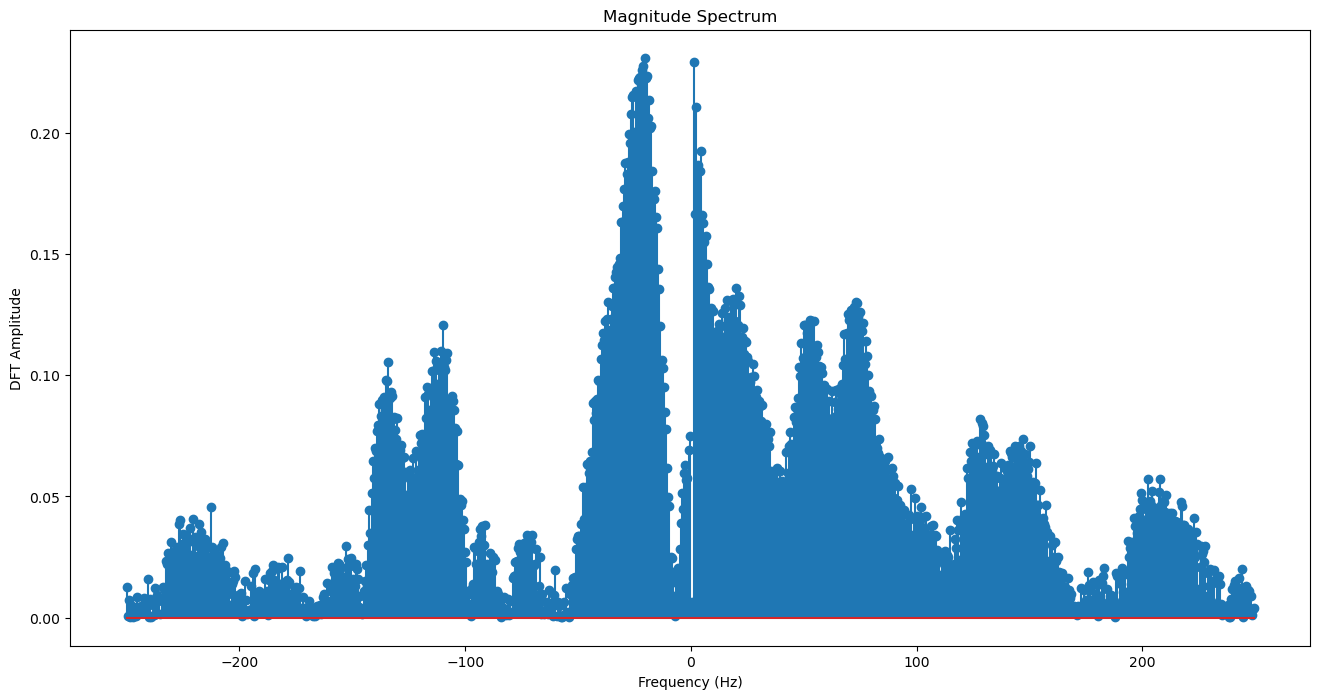

In [14]:
from Fourier import DiscreteFourierTransform

# the data set now is killing the kernel because it is too large 
dataset1_transform = DiscreteFourierTransform(dataset1_processed[0:1000], sr)
dataset1_transform.DFT()
dataset1_transform.DFTplot()

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline
def plot_dft(x, fs):
    """
    Compute the Discrete Fourier Transform (DFT) of the input signal x and plot the magnitude spectrum.
    """
    N = len(x)
    X = np.fft.fft(x)  # Compute the DFT using numpy's fft function
    freq = np.fft.fftfreq(N, d=1/fs)  # Compute the frequency axis

    # Plot the magnitude spectrum
    plt.figure(figsize=(16, 8))
    #the magnitude was divided by the sample rate to match it to the original amplitude of the signal

    plt.stem(freq, np.abs(X)/fs)
    
    #plt.grid(which='major', axis='both', linestyle='--', linewidth=0.5, color='gray')
    #plt.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, color='black')
    plt.xticks(np.arange(-15, 15, 2))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.grid()
    plt.show()
    
def plot_dft_compare(x, fs, x_windowed):
    """
    Compute the Discrete Fourier Transform (DFT) of the input signal x and the windowed signal and plot the magnitude spectrum.
    """
    N = len(x)
    X = np.fft.fft(x)  # Compute the DFT using numpy's fft function
    freq = np.fft.fftfreq(N, d=1/fs)  # Compute the frequency axis
    dictionary= dict(zip(freq, X))
    dict1 = OrderedDict(sorted(dictionary.items()))
    #for the windowed function
    N_windowed = len(x_windowed)
    X_windowed = np.fft.fft(x_windowed)  # Compute the DFT using numpy's fft function
    freq_windowed = np.fft.fftfreq(N_windowed, d=1/fs)  # Compute the frequency axis
    dictionary2= dict(zip(freq_windowed, X_windowed))
    dict2 = OrderedDict(sorted(dictionary2.items()))
    # Plot the magnitude spectrum
    plt.figure(figsize=(16, 8))
    #the magnitude was divided by the sample rate to match it to the original amplitude of the signal

    #plt.stem(freq, np.abs(X)/fs, 'b')
    #plt.stem(freq_windowed, np.abs(X_windowed)/fs, 'r')
    plt.plot(np.array(list(dict1.keys())), abs(np.array(list(dict1.values())))/fs, 'b', label='original')
    plt.plot(np.array(list(dict2.keys())), abs(np.array(list(dict2.values())))/fs, 'r', label='windowed')
    #plt.grid(which='major', axis='both', linestyle='--', linewidth=0.5, color='gray')
    #plt.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, color='black')
    plt.xticks(np.arange(-15, 15, 2))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.grid()
    plt.legend()
    plt.show()

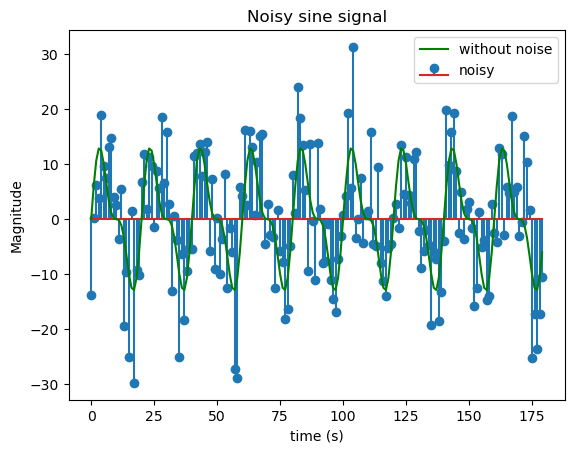

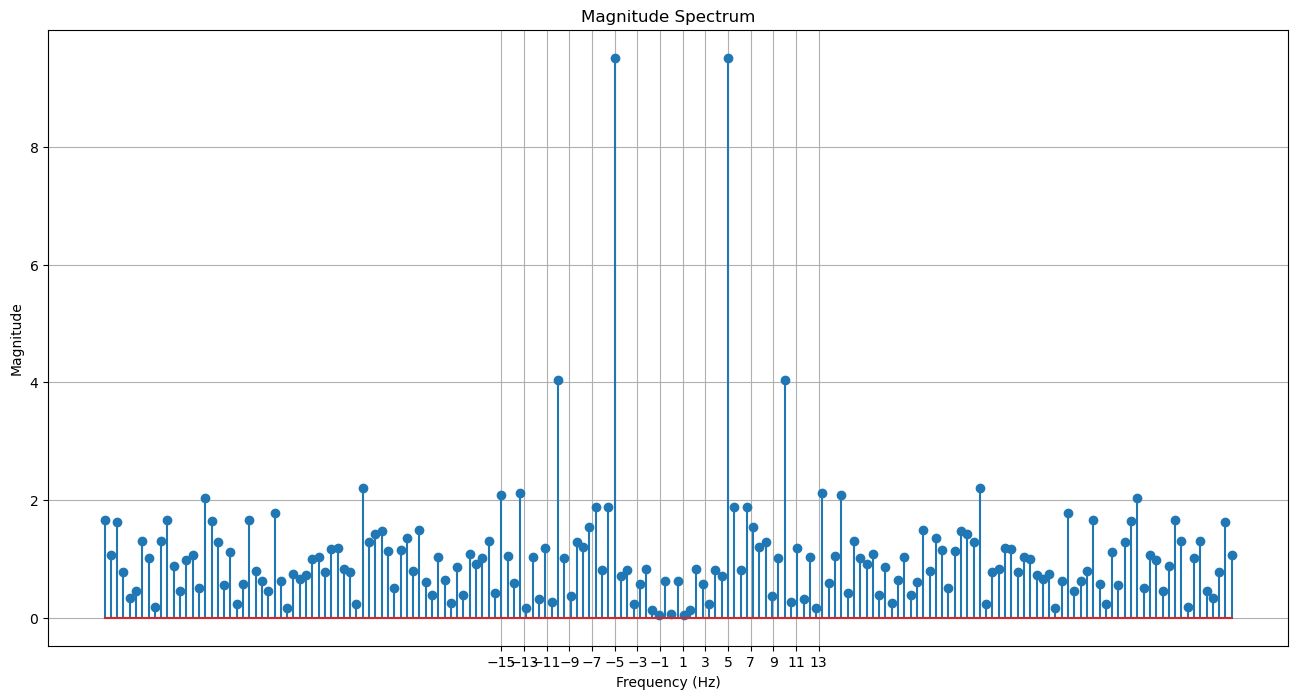

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
#creating our own dataset - a sum of sine waves 10 sin(2pi 5x) and 5 sin(2pi 10x)

#in time domain
amplitude1=10
freq1=5
amplitude2=5
freq2=10
st=0.01
sampled_val=[]
sampled_val_wo_noise=[]
t=[]
sampling_range=180
for i in range (sampling_range):
    t.append(i)
    sampled_val.append(amplitude1*np.sin(i*2*np.pi*freq1*st)+amplitude2*np.sin(i*2*np.pi*freq2*st)+(amplitude1+amplitude2)*0.5*np.random.normal(scale=1))
    sampled_val_wo_noise.append(amplitude1*np.sin(i*2*np.pi*freq1*st)+amplitude2*np.sin(i*2*np.pi*freq2*st))
#plot the function as a sanity check
plt.stem(t,sampled_val, label='noisy')
plt.plot(t,sampled_val_wo_noise, 'g', label='without noise')
plt.xlabel('time (s)')
plt.ylabel('Magnitude')
plt.title('Noisy sine signal')
plt.legend()
plt.show()
dataset_sin=np.array(sampled_val)
plot_dft(sampled_val,1/st)


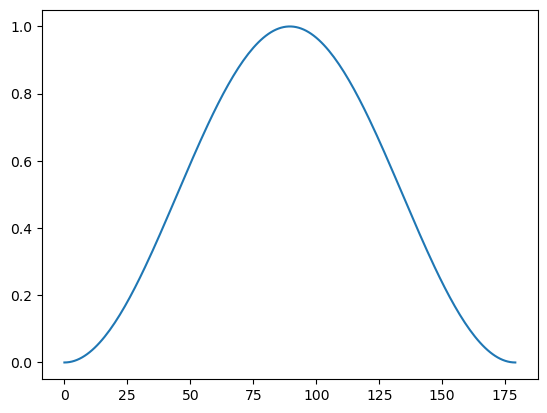

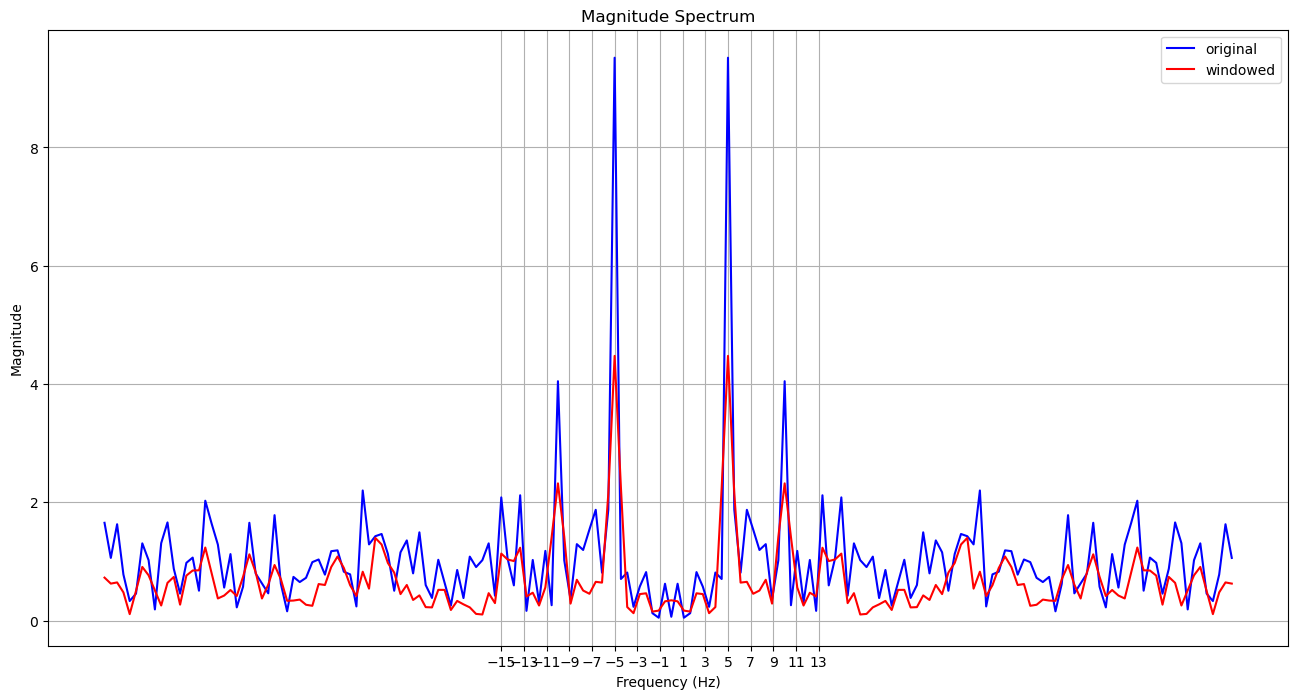

In [17]:
#windowing function
#hanning window - the most basic, will cut the effect of side signals
dataset_sin_hanning=dataset_sin*np.hanning(sampling_range)
plt.plot(np.hanning(sampling_range))
plt.show()
window=np.hanning(sampling_range)
#print(window[0])
#print(dataset_sin[0])
#print(dataset_sin_hanning)
#dataset_sin_hanning_transform = DiscreteFourierTransform(dataset_sin_hanning[0:sampling_range], 1/sr)
#dataset_sin_hanning_transform.DFT()
#dataset_sin_hanning_transform.DFTplot()
plot_dft_compare(sampled_val,1/st,dataset_sin_hanning)
#hanning window doesnt work if frequency peaks are close to each other - they are more distinct when the window wasnt used

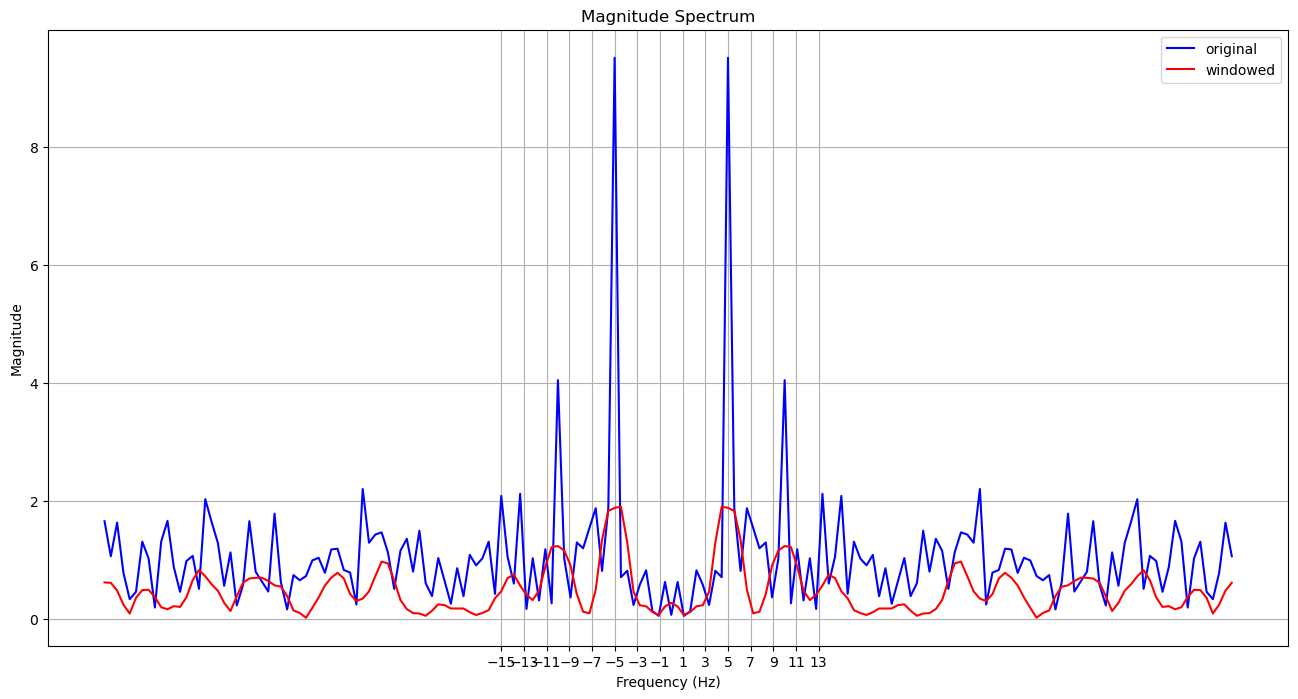

In [18]:
#flattopwindow
flattopwindow = signal.windows.flattop(sampling_range)
flattopwindow = dataset_sin * flattopwindow
dataset_sin_flattopwindow = DiscreteFourierTransform(flattopwindow[0:sampling_range], 1/sr)
dataset_sin_flattopwindow.DFT()
#dataset_sin_flattopwindow.DFTplot()
plot_dft_compare(sampled_val,1/st,flattopwindow)

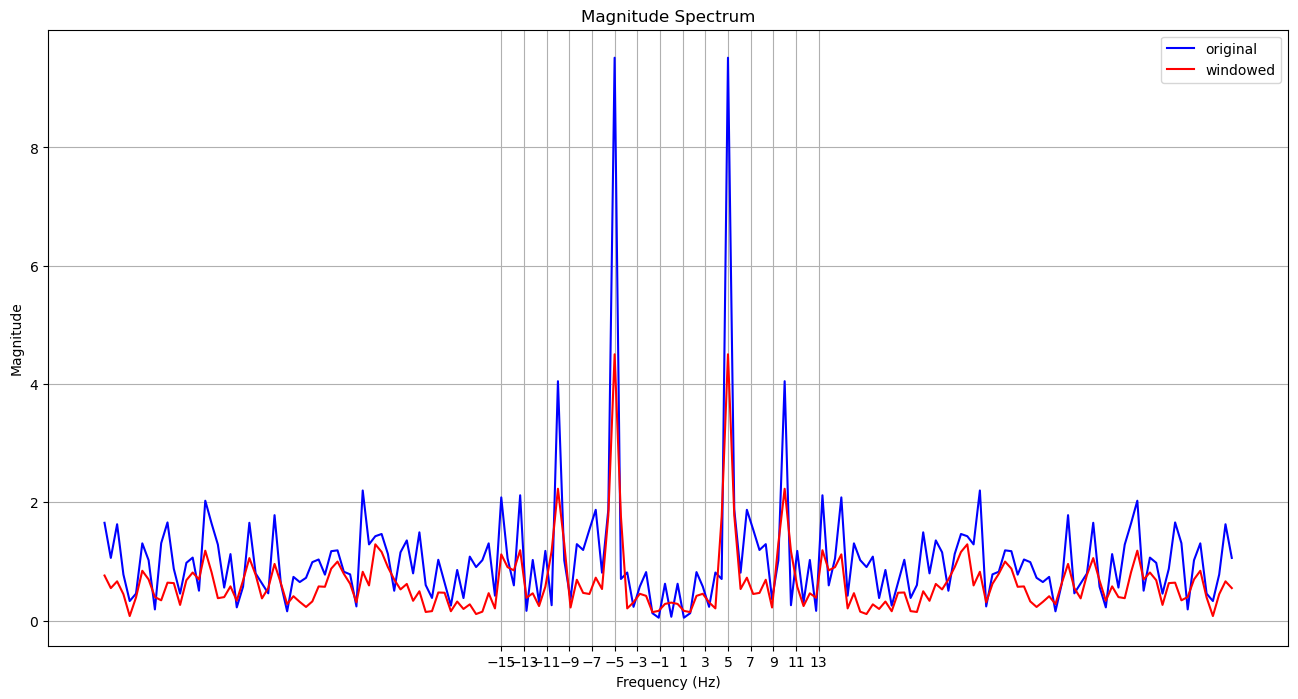

In [19]:
#triangular window
bartlettwindow = np.bartlett(sampling_range)
bartlettwindow = dataset_sin * bartlettwindow
dataset_sin_bartlettwindow = DiscreteFourierTransform(bartlettwindow[0:sampling_range], 1/sr)
dataset_sin_bartlettwindow.DFT()
#dataset_sin_bartlettwindow.DFTplot()
plot_dft_compare(sampled_val,1/st,bartlettwindow)

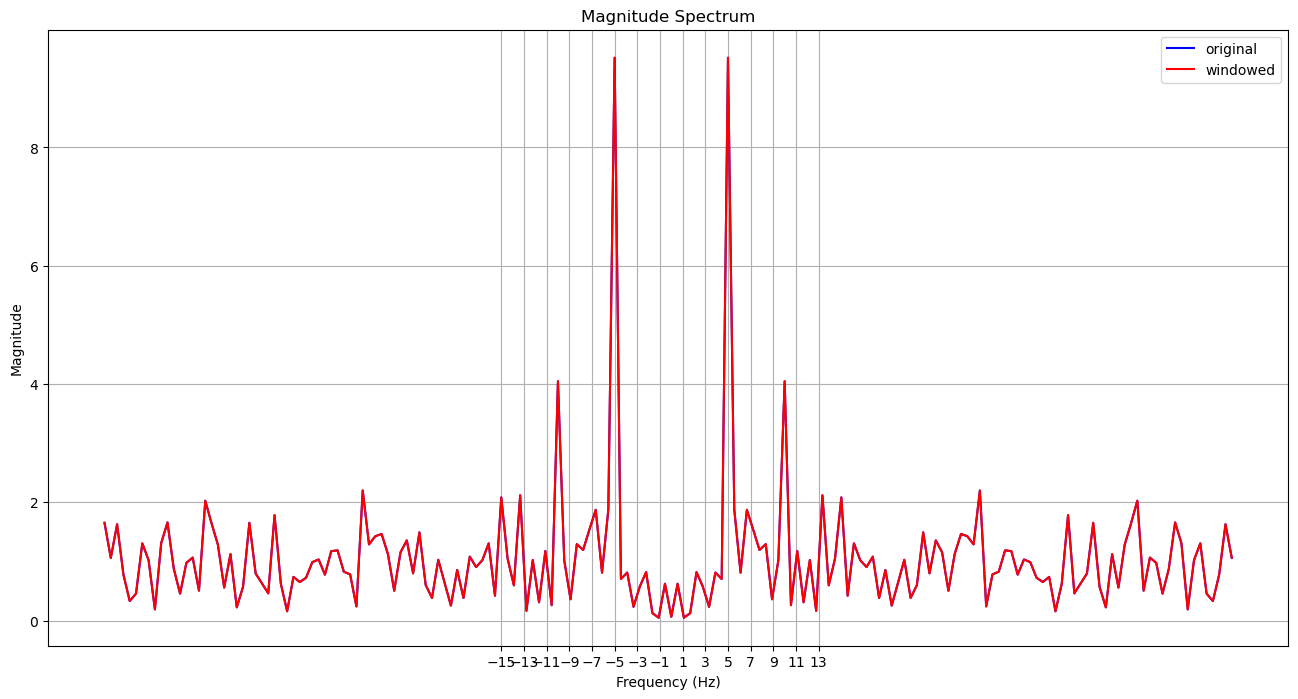

In [20]:
#rectangular window
boxcarwindow = signal.windows.boxcar(sampling_range)
boxcarwindow = dataset_sin * boxcarwindow
dataset_sin_boxcarwindow = DiscreteFourierTransform(boxcarwindow[0:sampling_range], 1/sr)
dataset_sin_boxcarwindow.DFT()
#dataset_sin_boxcarwindow.DFTplot()
plot_dft_compare(sampled_val,1/st,boxcarwindow)
#plot_dft_compare(sampled_val,1/st,sampled_val)

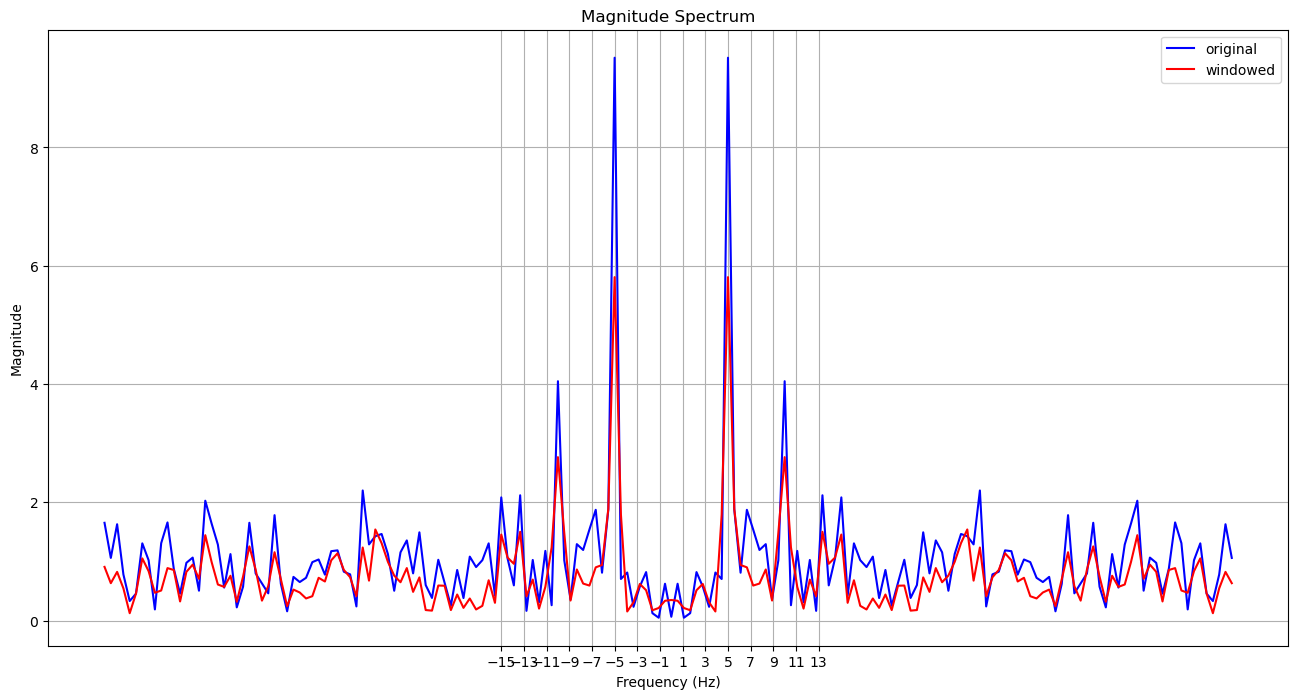

In [21]:
#rectangular window
cosinewindow = signal.windows.cosine(sampling_range)
cosinewindow = dataset_sin * cosinewindow
dataset_sin_cosinewindow = DiscreteFourierTransform(cosinewindow[0:sampling_range], 1/sr)
dataset_sin_cosinewindow.DFT()
#dataset_sin_cosinewindow.DFTplot()
plot_dft_compare(sampled_val,1/st,cosinewindow)